In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import plot_partial_dependence, permutation_importance
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('fake_users_data.csv', index_col=0)

In [3]:
#df = df.loc[df.route_id != 'No hay ruta', :]

In [4]:
df['age'] = SimpleImputer(strategy='mode')

In [5]:
df = pd.get_dummies(df, prefix=['age', 'gender', 'type', 'diff', 'comp', 'trans'], columns=['age', 'gender', 'type_route', 'difficulty','accompaniment', 'transport'])

In [6]:
def mapping(x):
    if x == 'Gratis':
        return 1
    elif x == '1-50 Euros':
        return 2
    elif x == '+50 Euros':
        return 3
    else:
        return 9999

df['price'] = df['price'].apply(mapping)

In [7]:
#df['time'] =  df.time.str.replace(' ','').str.replace('horas','').str.split('-')

In [8]:
#df['time'] = df.time.map(lambda x: ( ( int(x[0]) + int(x[1]) )/ 2))


In [9]:
df

,time,price,route_id,age_SimpleImputer(strategy='mode'),gender_Hombre,gender_Mujer,gender_Prefiero no decirlo,type_Historica,type_Literaria,type_Patrimonio,type_Turistica,diff_Alta,diff_Baja,comp_Amigos,comp_Familia,comp_Pareja,comp_Solo,trans_Bicicleta,trans_Pie
0,3.5,1,Contes Blasco Ibañez – Ruta 1,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1
1,1.5,3,Trinitat - L'Almodí,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,3.5,3,Glorieta-Santa Catalina,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0
3,5.5,1,Glorieta-Santa Catalina,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0
4,3.5,3,Ruta dels Pecats a l'entorn del Mercat Central,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,5.5,3,Ruta València amb bicicleta,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
29996,3.5,2,Ruta dels Pecats a l'entorn del Mercat Central,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0
29997,3.5,3,Trinitat - L'Almodí,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1
29998,3.5,1,Glorieta-Santa Catalina,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0


In [10]:
df.to_csv('isma_synthetic_data.csv')

In [11]:
#df = df.drop('routes', axis=1)

# DATA PREPARATION

In [12]:
X = df.drop(columns=['route_id'], axis=1)
y = df[['route_id']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
rnd_clf = RandomForestClassifier(n_estimators=500,
                                 max_leaf_nodes=16,
                                 random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict_proba(X_test)

C:\Users\Paris\AppData\Local\Temp\ipykernel_14080\1642560799.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd_clf.fit(X_train, y_train)


In [20]:
y_pred_rf

array(["Trinitat - L'Almodí", "Trinitat - L'Almodí",
       "Trinitat - L'Almodí", ..., "Trinitat - L'Almodí",
       'Arbres: La volta al món', "Trinitat - L'Almodí"], dtype=object)

In [15]:
accuracy_score(y_test, y_pred_rf)

0.5121666666666667

<AxesSubplot:>

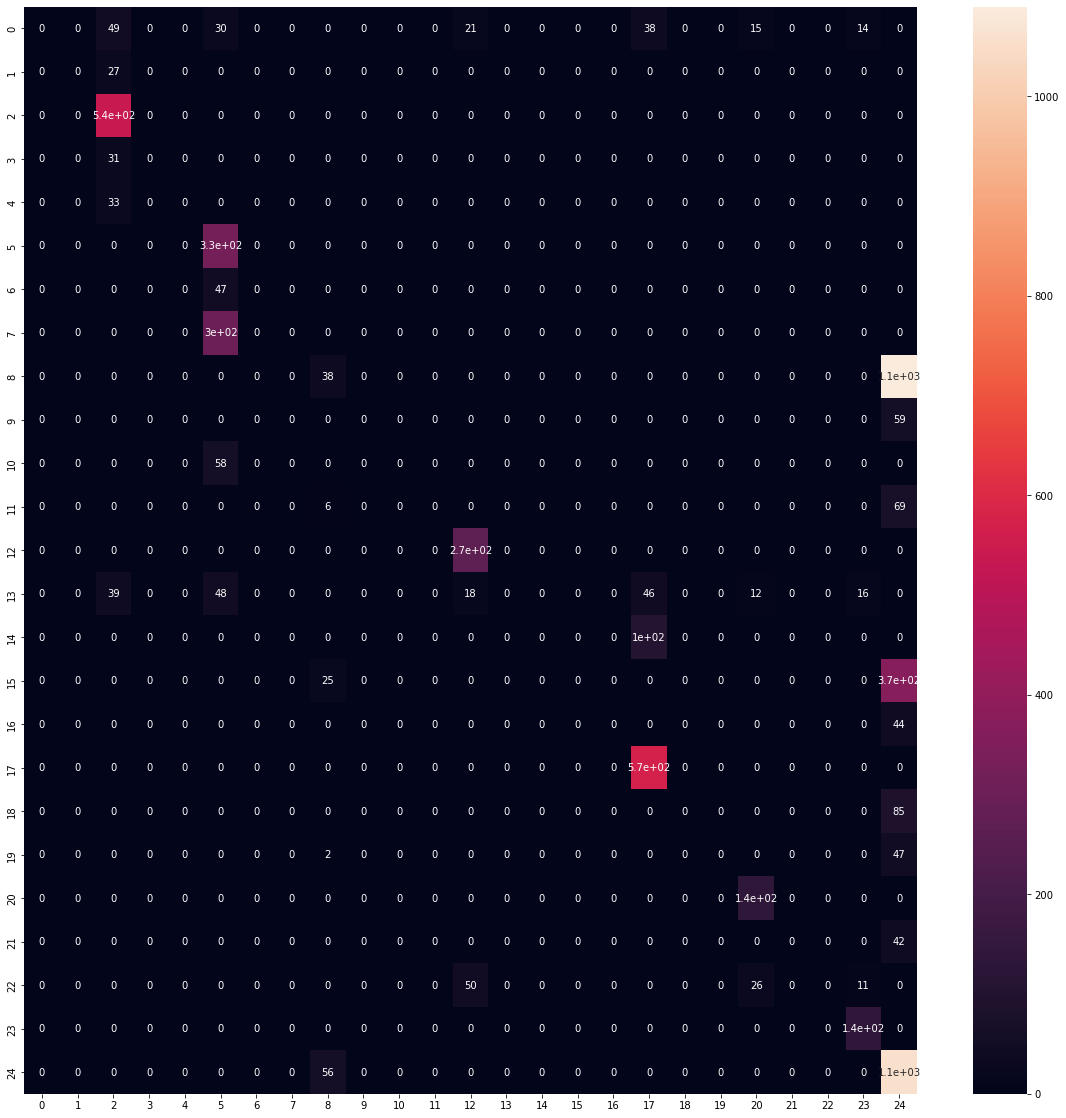

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True)

In [17]:
rnd_clf.feature_names_in_

array(['time', 'price', "age_SimpleImputer(strategy='mode')",
       'gender_Hombre', 'gender_Mujer', 'gender_Prefiero no decirlo',
       'type_Historica', 'type_Literaria', 'type_Patrimonio',
       'type_Turistica', 'diff_Alta', 'diff_Baja', 'comp_Amigos',
       'comp_Familia', 'comp_Pareja', 'comp_Solo', 'trans_Bicicleta',
       'trans_Pie'], dtype=object)

In [18]:
rnd_clf.feature_importances_

array([3.64051573e-02, 5.80140021e-04, 0.00000000e+00, 3.03237018e-04,
       1.97352843e-04, 1.82314287e-04, 1.33848634e-01, 8.18357779e-02,
       8.14215290e-02, 1.23158555e-01, 2.67350499e-01, 2.29512240e-01,
       1.75528033e-04, 2.89051453e-04, 2.34046814e-04, 2.53461396e-04,
       2.23676524e-02, 2.18848248e-02])

In [19]:
import pickle

# Guardar modelo

filename = 'finished_model'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(rnd_clf, archivo_salida)